# Random Forest on Lending Club

#### The dataset I will be using is from LendingClub.com. Apparantly, it's a website that allows people to borrow money from others. To be precise, the data to be used is from the year 2007 to 2010. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
loans = pd.read_csv('loan_data.csv')

In [3]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [6]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


#### Obligatory Data Analysis

In [11]:
cred0 = loans[loans['credit.policy']==0].fico
cred1 = loans[loans['credit.policy']==1].fico

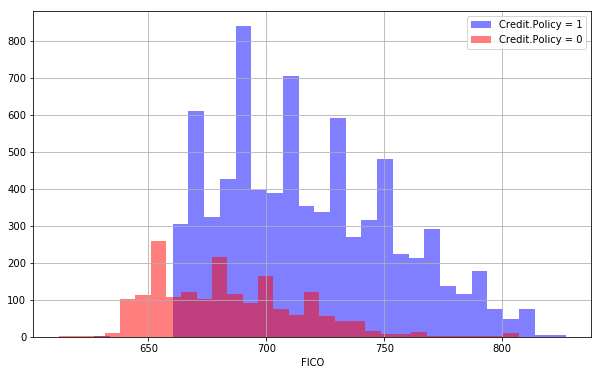

In [31]:
plt.figure(figsize=(10,6))
cred1.hist(bins = 30, color = 'blue',alpha = 0.5, label = 'Credit.Policy = 1')
cred0.hist(bins = 30, color = 'red',alpha = 0.5, label = 'Credit.Policy = 0')
plt.legend()
plt.xlabel('FICO')

In [28]:
notpaid0 = loans[loans['not.fully.paid']==0].fico
notpaid1 = loans[loans['not.fully.paid']==1].fico

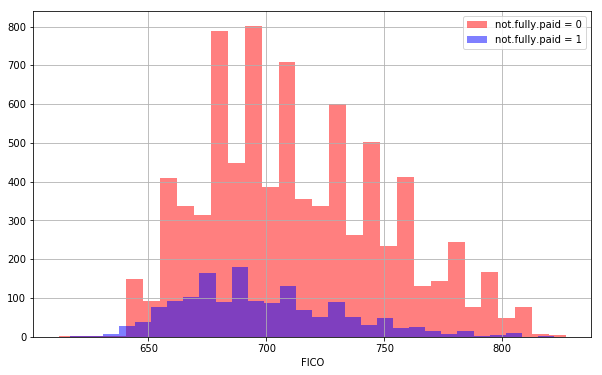

In [33]:
plt.figure(figsize=(10,6))
notpaid0.hist(bins = 30, color = 'red',alpha = 0.5, label = 'not.fully.paid = 0')
notpaid1.hist(bins = 30, color = 'blue',alpha = 0.5, label = 'not.fully.paid = 1')
plt.legend()
plt.xlabel('FICO')

In [35]:
loans.head(1)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.1,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0


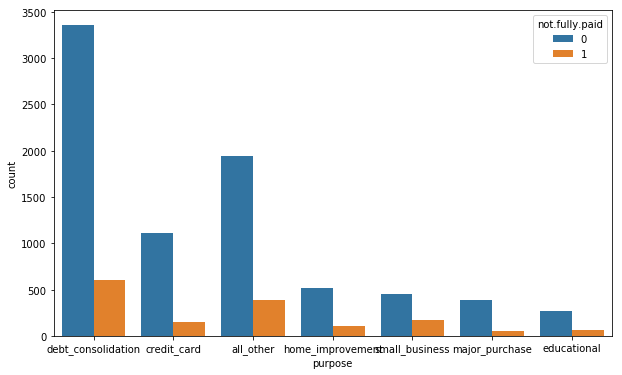

In [37]:
plt.figure(figsize =(10,6))
sns.countplot(x='purpose', data=loans, hue = 'not.fully.paid')

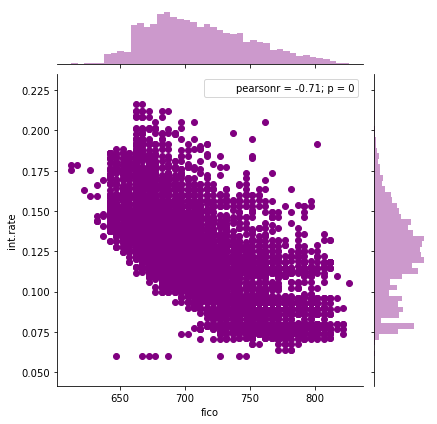

In [38]:
sns.jointplot(x='fico', y = 'int.rate', data = loans, color = 'purple')

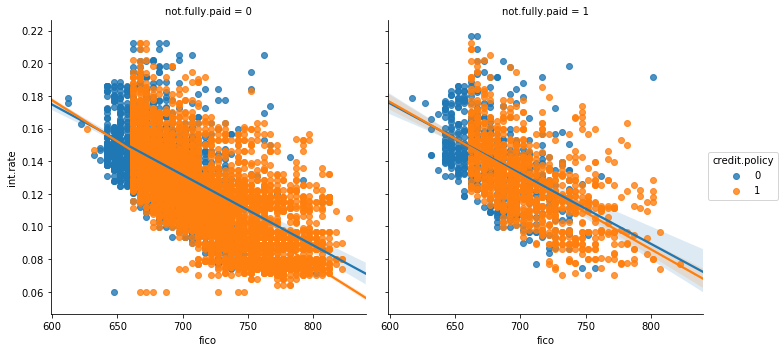

In [39]:
sns.lmplot(x='fico', y ='int.rate',data = loans, col='not.fully.paid', hue = 'credit.policy')

#### Now to start Machine Learning

In [40]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


##### purpose is the only non-numeric that we need to change

In [41]:
newloans = pd.get_dummies(loans, columns=['purpose'], drop_first=True)

In [42]:
newloans.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [43]:
newloans.columns

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement',
       'purpose_major_purchase', 'purpose_small_business'],
      dtype='object')

In [44]:
from sklearn.model_selection import train_test_split

In [50]:
X = newloans.drop('not.fully.paid', axis = 1)
y = newloans['not.fully.paid']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=321)

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
mytree = DecisionTreeClassifier()

In [58]:
mytree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [59]:
pred = mytree.predict(X_test)

In [60]:
from sklearn.metrics import classification_report, confusion_matrix

In [62]:
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[1666  342]
 [ 302   85]]


             precision    recall  f1-score   support

          0       0.85      0.83      0.84      2008
          1       0.20      0.22      0.21       387

avg / total       0.74      0.73      0.74      2395



#### Now to do it in Random Forests

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
runforest = RandomForestClassifier(n_estimators=200)

In [65]:
runforest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [66]:
pred = runforest.predict(X_test)
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[1996   12]
 [ 383    4]]


             precision    recall  f1-score   support

          0       0.84      0.99      0.91      2008
          1       0.25      0.01      0.02       387

avg / total       0.74      0.84      0.77      2395



##### Random Forest is much better it seems, but it has a bad time predicting the 1 values here..